In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [42]:
df= pd.read_csv("C:/Users/Hyndavi/Desktop/app/excel.csv")
#Cleaning the sales column
df['Net_Sales_clean']=df['Net Sales'].str.extract('(\d+)')
df['Net_Sales_clean']=df['Net_Sales_clean'].fillna(0)
df['Negative_flag']=np.where(df['Net Sales'].str[-1]==')',1,0)
df['Net_Sales_clean']=df['Net_Sales_clean'].astype('int')
df['Net_Sales_clean_2']=np.where(df['Negative_flag']==1,df['Net_Sales_clean']*-1,df['Net_Sales_clean'])


# Section1 Reorder Trend

In [168]:
#Create the same slide considering only 2019 data. Does the reorder trend remain the same?
df['Date'] = pd.to_datetime(df['Date'])
year_19 = df[df['Date'].dt.year == 2019]
newdf=year_19[['Order num','Email']]
newdf=newdf.drop_duplicates()
newdf = newdf.groupby([ 'Email'],as_index=False).agg({'Order num':'count'})
order_ferq = newdf.groupby([ 'Order num'],as_index=False).agg({'Email':'count'})
order_ferq.columns=['Order_frquency','Num_of_customers']
order_ferq['Total_customers']=order_ferq['Num_of_customers'].sum()
order_ferq['Customer_perc']=order_ferq['Num_of_customers']/order_ferq['Total_customers']

,Order_frquency,Num_of_customers,Total_customers,Customer_perc
0,1,6815,9078,0.750716
1,2,1367,9078,0.150584
2,3,480,9078,0.052875
3,4,207,9078,0.022802
4,5,99,9078,0.010905
5,6,52,9078,0.005728
6,7,22,9078,0.002423
7,8,13,9078,0.001432
8,9,8,9078,0.000881
9,10,4,9078,0.000441


# Section2 Average Order Value (AOV) and Units / Order

In [256]:
df_cust_count=df[['Email','Order num']].drop_duplicates()
df_cust_count=df_cust_count.groupby(['Email'],as_index=False).agg({'Order num':'count'})
df_cust_count=pd.merge(df_cust_count,df,on='Email')
df_cust_count=df_cust_count[['Order num_x','Order num_y','Net_Sales_clean_2','Qty']]
df_cust_count.columns=['Shop_count','Orders','Total_sales','Qty']
df_cust_count=df_cust_count.groupby(['Shop_count'],as_index=False).agg({'Total_sales':'sum','Orders':'nunique','Qty':'sum'})
df_cust_count['cust_type1']=np.where(df_cust_count['Shop_count']==1,1,0)
df_cust_count['cust_type1+']=np.where(df_cust_count['Shop_count']>1,1,0)
df_cust_count['cust_type2+']=np.where(df_cust_count['Shop_count']>2,1,0)
df_cust_count['cust_type3+']=np.where(df_cust_count['Shop_count']>3,1,0)
df_cust_count['cust_type4+']=np.where(df_cust_count['Shop_count']>4,1,0)
df_cust_count

,Shop_count,Total_sales,Orders,Qty,cust_type1,cust_type1+,cust_type2+,cust_type3+,cust_type4+
0,1,1486716,9356,13986,1,0,0,0,0
1,2,751723,4070,6907,0,1,0,0,0
2,3,497110,2508,4532,0,1,1,0,0
3,4,375523,1760,3322,0,1,1,1,0
4,5,243187,1145,2166,0,1,1,1,1
5,6,225571,954,1902,0,1,1,1,1
6,7,143776,602,1165,0,1,1,1,1
7,8,89154,352,758,0,1,1,1,1
8,9,81473,369,672,0,1,1,1,1
9,10,71318,330,623,0,1,1,1,1


In [257]:
df_cust_count_1=df_cust_count[df_cust_count['cust_type1']==1].sum()
df_cust_count_1

Shop_count           1
Total_sales    1486716
Orders            9356
Qty              13986
cust_type1           1
cust_type1+          0
cust_type2+          0
cust_type3+          0
cust_type4+          0
dtype: int64

In [258]:
df_cust_count_plus1=df_cust_count[df_cust_count['cust_type1+']==1].sum()
df_cust_count_plus1


Shop_count         372
Total_sales    2711719
Orders           13100
Qty              24102
cust_type1           0
cust_type1+         24
cust_type2+         23
cust_type3+         22
cust_type4+         21
dtype: int64

In [259]:
df_cust_count_plus2=df_cust_count[df_cust_count['cust_type2+']==1].sum()
df_cust_count_plus2


Shop_count         370
Total_sales    1959996
Orders            9030
Qty              17195
cust_type1           0
cust_type1+         23
cust_type2+         23
cust_type3+         22
cust_type4+         21
dtype: int64

In [260]:
df_cust_count_plus3=df_cust_count[df_cust_count['cust_type3+']==1].sum()
df_cust_count_plus3


Shop_count         367
Total_sales    1462886
Orders            6522
Qty              12663
cust_type1           0
cust_type1+         22
cust_type2+         22
cust_type3+         22
cust_type4+         21
dtype: int64

In [261]:
df_cust_count_plus4=df_cust_count[df_cust_count['cust_type4+']==1].sum()
df_cust_count_plus4

Shop_count         363
Total_sales    1087363
Orders            4762
Qty               9341
cust_type1           0
cust_type1+         21
cust_type2+         21
cust_type3+         21
cust_type4+         21
dtype: int64

In [ ]:
#Does AOV metric help understand sales growth as consumers place repeat orders? 


In [225]:
#Create the same slide considering only 2019 data. Is there a drop in AOV for any order frequency? 
df_cust_count_19=year_19[['Email','Order num']].drop_duplicates()
df_cust_count_19=df_cust_count_19.groupby(['Email'],as_index=False).agg({'Order num':'count'})
df_cust_count_19=pd.merge(df_cust_count_19,df,on='Email')
df_cust_count_19=df_cust_count_19[['Order num_x','Order num_y','Net_Sales_clean_2','Qty']]
df_cust_count_19.columns=['Shop_count','Orders','Total_sales','Qty']
df_cust_count_19=df_cust_count_19.groupby(['Shop_count'],as_index=False).agg({'Total_sales':'sum','Orders':'nunique','Qty':'sum'})
df_cust_count_19

,Shop_count,Total_sales,Orders,Qty
0,1,1398225,8399,13226
1,2,736558,3593,6587
2,3,424985,1930,3685
3,4,259031,1123,2272
4,5,151060,671,1310
5,6,101424,444,870
6,7,46269,198,374
7,8,33472,133,286
8,9,22780,94,199
9,10,22901,84,191


In [248]:
df_cust_count_19['cust_type_19_1']=np.where(df_cust_count_19['Shop_count']==1,1,0)
df_cust_count_19
df_cust_count_19['cust_type_19_1+']=np.where(df_cust_count_19['Shop_count']>1,1,0)
df_cust_count_19
df_cust_count_19['cust_type_19_2+']=np.where(df_cust_count_19['Shop_count']>2,1,0)
df_cust_count_19
df_cust_count_19['cust_type_19_3+']=np.where(df_cust_count_19['Shop_count']>3,1,0)
df_cust_count_19
df_cust_count_19['cust_type_19_4+']=np.where(df_cust_count_19['Shop_count']>4,1,0)
df_cust_count_19

,Shop_count,Total_sales,Orders,Qty,cust_type1,cust_type1+,cust_type2+,cust_type3+,cust_type4+,cust_type_19_1,cust_type_19_1+,cust_type_19_2+,cust_type_19_3+,cust_type_19_4+
0,1,1398225,8399,13226,1,0,0,0,0,1,0,0,0,0
1,2,736558,3593,6587,0,1,0,0,0,0,1,0,0,0
2,3,424985,1930,3685,0,1,1,0,0,0,1,1,0,0
3,4,259031,1123,2272,0,1,1,1,0,0,1,1,1,0
4,5,151060,671,1310,0,1,1,1,1,0,1,1,1,1
5,6,101424,444,870,0,1,1,1,1,0,1,1,1,1
6,7,46269,198,374,0,1,1,1,1,0,1,1,1,1
7,8,33472,133,286,0,1,1,1,1,0,1,1,1,1
8,9,22780,94,199,0,1,1,1,1,0,1,1,1,1
9,10,22901,84,191,0,1,1,1,1,0,1,1,1,1


In [247]:
df_cust_count_19_1=df_cust_count_19[df_cust_count_19['cust_type_19_1']==1].sum()
df_cust_count_19_1

Shop_count               1
Total_sales        1398225
Orders                8399
Qty                  13226
cust_type1               1
cust_type1+              0
cust_type2+              0
cust_type3+              0
cust_type4+              0
cust_type_19_1           1
cust_type_19_1+          0
cust_type_19_2+          0
cust_type_19_3+          0
cust_type_19_4+          0
dtype: int64

In [250]:
df_cust_count_19_plus1=df_cust_count_19[df_cust_count_19['cust_type_19_1+']==1].sum()
df_cust_count_19_plus1

Shop_count             187
Total_sales        1839565
Orders                8490
Qty                  16158
cust_type1               0
cust_type1+             16
cust_type2+             15
cust_type3+             14
cust_type4+             13
cust_type_19_1           0
cust_type_19_1+         16
cust_type_19_2+         15
cust_type_19_3+         14
cust_type_19_4+         13
dtype: int64

In [251]:
df_cust_count_19_plus2=df_cust_count_19[df_cust_count_19['cust_type_19_2+']==1].sum()
df_cust_count_19_plus2


Shop_count             185
Total_sales        1103007
Orders                4897
Qty                   9571
cust_type1               0
cust_type1+             15
cust_type2+             15
cust_type3+             14
cust_type4+             13
cust_type_19_1           0
cust_type_19_1+         15
cust_type_19_2+         15
cust_type_19_3+         14
cust_type_19_4+         13
dtype: int64

In [252]:
df_cust_count_19_plus3=df_cust_count_19[df_cust_count_19['cust_type_19_3+']==1].sum()
df_cust_count_19_plus3


Shop_count            182
Total_sales        678022
Orders               2967
Qty                  5886
cust_type1              0
cust_type1+            14
cust_type2+            14
cust_type3+            14
cust_type4+            13
cust_type_19_1          0
cust_type_19_1+        14
cust_type_19_2+        14
cust_type_19_3+        14
cust_type_19_4+        13
dtype: int64

In [253]:
df_cust_count_19_plus4=df_cust_count_19[df_cust_count_19['cust_type_19_4+']==1].sum()
df_cust_count_19_plus4


Shop_count            178
Total_sales        418991
Orders               1844
Qty                  3614
cust_type1              0
cust_type1+            13
cust_type2+            13
cust_type3+            13
cust_type4+            13
cust_type_19_1          0
cust_type_19_1+        13
cust_type_19_2+        13
cust_type_19_3+        13
cust_type_19_4+        13
dtype: int64

In [ ]:
#What checks will you apply on the raw data as well as the output to ensure the data accuracy?

# Section3. Consumer growth drivers

In [307]:
#What is more valuable for Lyka – adding more new customers or maintaining the existing customers? Why? 
customer_shops=df[['Email','Order num']].drop_duplicates().reset_index(drop=False)
customer_shops=customer_shops.groupby('Email',as_index=False).agg({'Order num': 'count'})
customer_shops=pd.merge(customer_shops,df, on='Email')
customer_shops['new_existing']=np.where(customer_shops['Order num_x']>1,'existing','new')
customer_shops=customer_shops.groupby(['Email','new_existing'],as_index=False).agg({'Order num_y':'count','Net_Sales_clean_2':'sum'})
customer_shops['AOV']=customer_shops['Net_Sales_clean_2']/customer_shops['Order num_y']
customer_shops_results=customer_shops.groupby('new_existing',as_index=False).mean()
customer_shops_results

,new_existing,Order num_y,Net_Sales_clean_2,AOV
0,existing,5.452645,683.052645,124.768806
1,new,1.402522,158.905088,115.582504


<AxesSubplot:xlabel='new_existing', ylabel='AOV'>

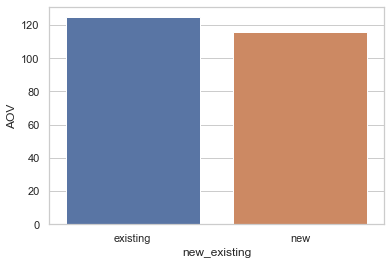

In [308]:
sns.set_theme(style="whitegrid")
d=sns.barplot(x="new_existing", y="AOV", data=customer_shops_results)
d

In [ ]:
# Adding more new customers is more valuable for lyka
# when we compare both Average order value of existing and new customers more orders done my new customers than existing

# Section4. Product Summary

In [51]:
#Create a table highlighting the sales by each product in two time periods – 
##Complete data 
##2019 data
#Include number of units, Net sales and % of total sales

df['Date'] = pd.to_datetime(df['Date'])
year_19 = df[df['Date'].dt.year == 2019]
year_19=year_19.groupby([ 'ProdName'],as_index=False).agg({'Net_Sales_clean_2':'sum','Qty':'sum'})
year_19.columns=['ProdName','Sales_2019','Qty_2019']
year_total=df.groupby([ 'ProdName'],as_index=False).agg({'Net_Sales_clean_2':'sum','Qty':'sum'})
year_total.columns=['ProdName','Sales_total','Qty_total']
df_prod_merge=pd.merge(year_total,year_19, on='ProdName' )
df_prod_merge['Total_2019_Sales']=df_prod_merge['Sales_2019'].sum()
df_prod_merge['Total_Overall_Sales']=df_prod_merge['Sales_total'].sum()
df_prod_merge['Perc_sales_2019']=df_prod_merge['Sales_2019']/df_prod_merge['Total_2019_Sales']
df_prod_merge['Perc_sales_overall']=df_prod_merge['Sales_total']/df_prod_merge['Total_Overall_Sales']
df_prod_merge

,ProdName,Sales_total,Qty_total,Sales_2019,Qty_2019,Total_2019_Sales,Total_Overall_Sales,Perc_sales_2019,Perc_sales_overall
0,Acne cream,244402,3698,135676,2138,2476853,4198435,0.054778,0.058213
1,Day cream,94608,1591,56740,956,2476853,4198435,0.022908,0.022534
2,Eye Treatment,575373,7067,343939,4325,2476853,4198435,0.138861,0.137045
3,Hand cream,63429,1159,33206,608,2476853,4198435,0.013407,0.015108
4,Hydra moisturizer,275077,5051,169409,3118,2476853,4198435,0.068397,0.065519
5,Men's cream,70135,291,42695,179,2476853,4198435,0.017238,0.016705
6,Moisturizer,9820,181,275,5,2476853,4198435,0.000111,0.002339
7,Neck cream,302941,2795,196328,1812,2476853,4198435,0.079265,0.072156
8,Neck serum,805314,4198,422432,2224,2476853,4198435,0.170552,0.191813
9,Night cream,320580,1671,287625,1502,2476853,4198435,0.116125,0.076357


# Section5. Product reorder trends

In [57]:
#5A Which are the top 5 products? 
df_top_products=df.groupby(['ProdName'],as_index=False).agg({'Net_sales_clean_2':'sum','Qty':'sum'})
df_top_products=df_top_products.sort_values('Net_Sales_clean_2',ascending=False).reset_index(drop=True)
df_top_products
top_5_products=df_top_products.head(5)
top_5_products

,ProdName,Net_Sales_clean_2,Qty
0,Skin treatment,1153760,6067
1,Neck serum,805314,4198
2,Eye Treatment,575373,7067
3,Night cream,320580,1671
4,Neck cream,302941,2795


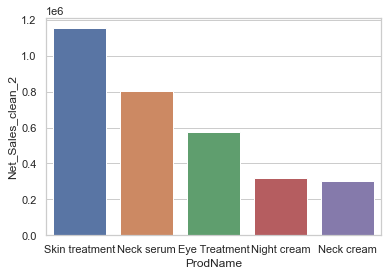

In [231]:
sns.barplot(data=top_5_products,x=top_5_products.ProdName,y=top_5_products.Net_Sales_clean_2)
plt.show()

In [66]:
#5b How many consumers ordered all the 5 products? 
top5_product_buyers=df[df['ProdName'].isin(top_5_products['ProdName'])]
top5_product_buyers=top5_product_buyers[['Email','ProdName']].drop_duplicates().reset_index(drop=True)
top5_product_buyers=top5_product_buyers.groupby(['Email'],as_index=False).agg({'ProdName':'count'})
top5_product_buyers=top5_product_buyers[top5_product_buyers['ProdName']==5]
top5_product_buyers
#65 unique customers orderd all 5 products

,Email,ProdName
150,aGIMMELLI2@gmail.com,5
225,aLBreech2@gmail.com,5
313,aRichpoppy702@gmail.com,5
334,aSquirrely12202@gmail.com,5
430,aaddydingo2@gmail.com,5
...,...,...
8489,ataylorinhb2@gmail.com,5
8511,atelizabeth562@gmail.com,5
8534,aterriacrosby2@gmail.com,5
8675,atonnjanis2@gmail.com,5


In [69]:
#5C Can you give more insights on product reorder trend?
#5C(I)Number of orders required by these customers to purchase all 5 products
df_top_customers=df[df['Email'].isin(top5_product_buyers['Email'])]
df_top_customers=df_top_customers[['Order num','Email']].drop_duplicates()
df_top_customers=df_top_customers.groupby(['Email'],as_index=False).agg({'Order num':'count'})
df_top_customers

,Email,Order num
0,aGIMMELLI2@gmail.com,4
1,aLBreech2@gmail.com,5
2,aRichpoppy702@gmail.com,4
3,aSquirrely12202@gmail.com,8
4,aaddydingo2@gmail.com,13
...,...,...
60,ataylorinhb2@gmail.com,5
61,atelizabeth562@gmail.com,12
62,aterriacrosby2@gmail.com,3
63,atonnjanis2@gmail.com,9


In [302]:
#5c(ii)Product with the highest repurchase rate
df_rr=df[['ProdName','Order num','Email']].drop_duplicates()
df_rr
#Skin treatment,Neck serum,Eye Treatment
df_skin=df[df['ProdName']=='Skin treatment']
df_skin=df_skin[['Order num','Email','Date']]
unique_skin_shoppers=len(df_skin[['Email']].drop_duplicates())
unique_skin_shoppers
df_skin=df_skin.groupby('Email',as_index=False).agg({'Order num':'count'})
df_skin=df_skin[df_skin['Order num']>=2]
skin_2_shopers=len(df_skin[['Email']].drop_duplicates())
skin_2_shopers/unique_skin_shoppers

0.291319857312723

In [92]:
#5c(iii)How long do customers take to buy the portfolio of these top 5 products? (in terms of days/years)
df_min_date=df_top_customers.groupby('Email',as_index=False)['Date'].min()
df_min_date.columns=['Email','min_date']
df_max_date=df_top_customers.groupby('Email',as_index=False)['Date'].max()
df_max_date.columns=['Email','max_date']
df_date_merge=pd.merge(df_max_date,df_min_date,on='Email')
df_date_merge['date_Diff']=df_date_merge['max_date']-df_date_merge['min_date']
df_date_merge

,Email,max_date,min_date,date_Diff
0,aGIMMELLI2@gmail.com,2019-12-01,2019-02-05,299 days
1,aLBreech2@gmail.com,2019-12-02,2019-01-05,331 days
2,aRichpoppy702@gmail.com,2019-07-04,2019-02-08,146 days
3,aSquirrely12202@gmail.com,2019-12-01,2018-04-11,599 days
4,aaddydingo2@gmail.com,2019-11-06,2017-12-09,697 days
...,...,...,...,...
60,ataylorinhb2@gmail.com,2019-11-06,2018-05-10,545 days
61,atelizabeth562@gmail.com,2019-12-02,2018-01-23,678 days
62,aterriacrosby2@gmail.com,2019-08-23,2017-02-23,911 days
63,atonnjanis2@gmail.com,2019-12-07,2018-07-11,514 days


# Section6. Sales performance	

In [115]:
#Create the following visualizations – 
#6A Graph showing month over month sales and number of unique consumers
df_month=df[['Date','Net_Sales_clean_2','Email']]
df_month['Year']=df_month['Date'].dt.year
df_month['Month']=df_month['Date'].dt.month
df_month['year_month']=df_month['Year'].astype('str')+'-'+ df_month['Month'].astype('str')
df_month=df_month.groupby('year_month',as_index=False).agg({'Net_Sales_clean_2':'sum','Email':'nunique'})
df_month

C:\Users\Hyndavi\AppData\Local\Temp/ipykernel_18700/1928552025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Year']=df_month['Date'].dt.year
C:\Users\Hyndavi\AppData\Local\Temp/ipykernel_18700/1928552025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month']=df_month['Date'].dt.month
C:\Users\Hyndavi\AppData\Local\Temp/ipykernel_18700/1928552025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,year_month,Net_Sales_clean_2,Email
0,2017-1,13860,73
1,2017-10,46090,246
2,2017-11,43625,232
3,2017-12,48170,226
4,2017-2,22380,103
5,2017-3,23740,112
6,2017-4,24980,130
7,2017-5,29291,157
8,2017-6,32523,180
9,2017-7,36450,178


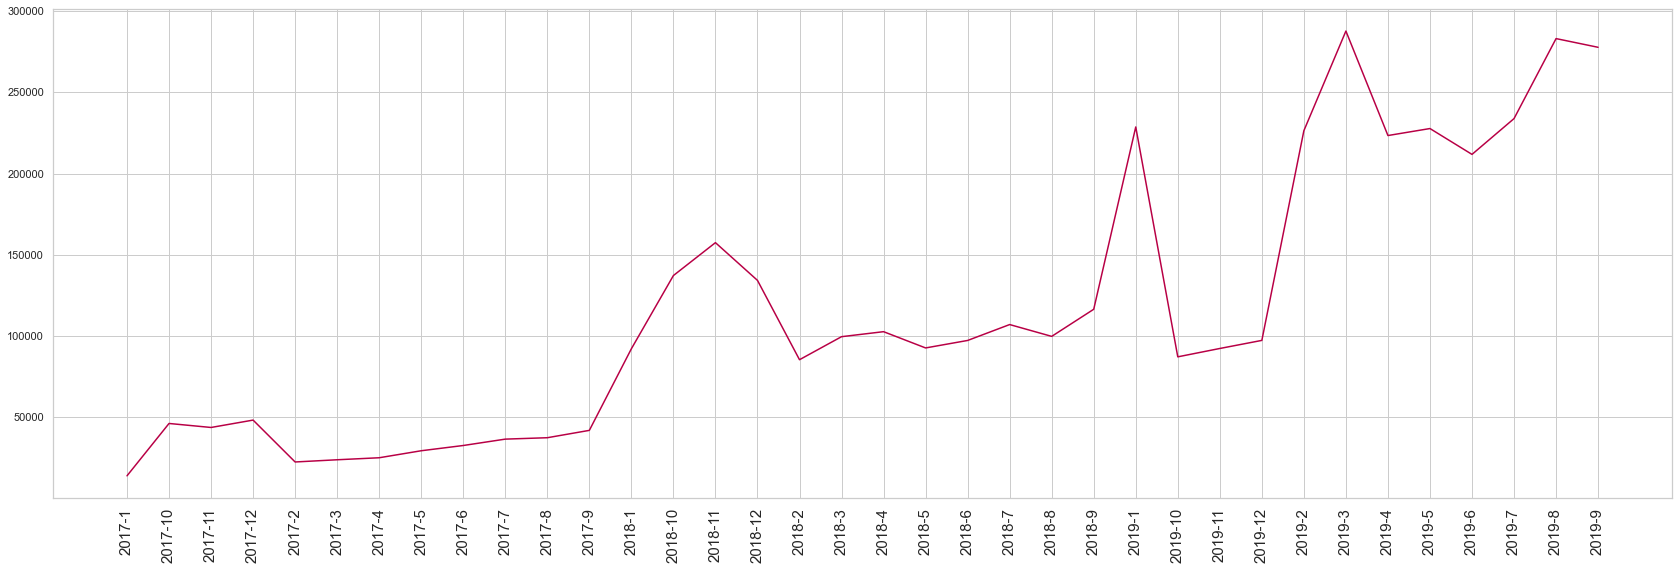

In [271]:
plt.figure(figsize=(29,9))
plt.plot(df_month['year_month'],df_month['Net_Sales_clean_2'],color='#b80045')
plt.xticks(rotation='vertical',size=15)
plt.show()

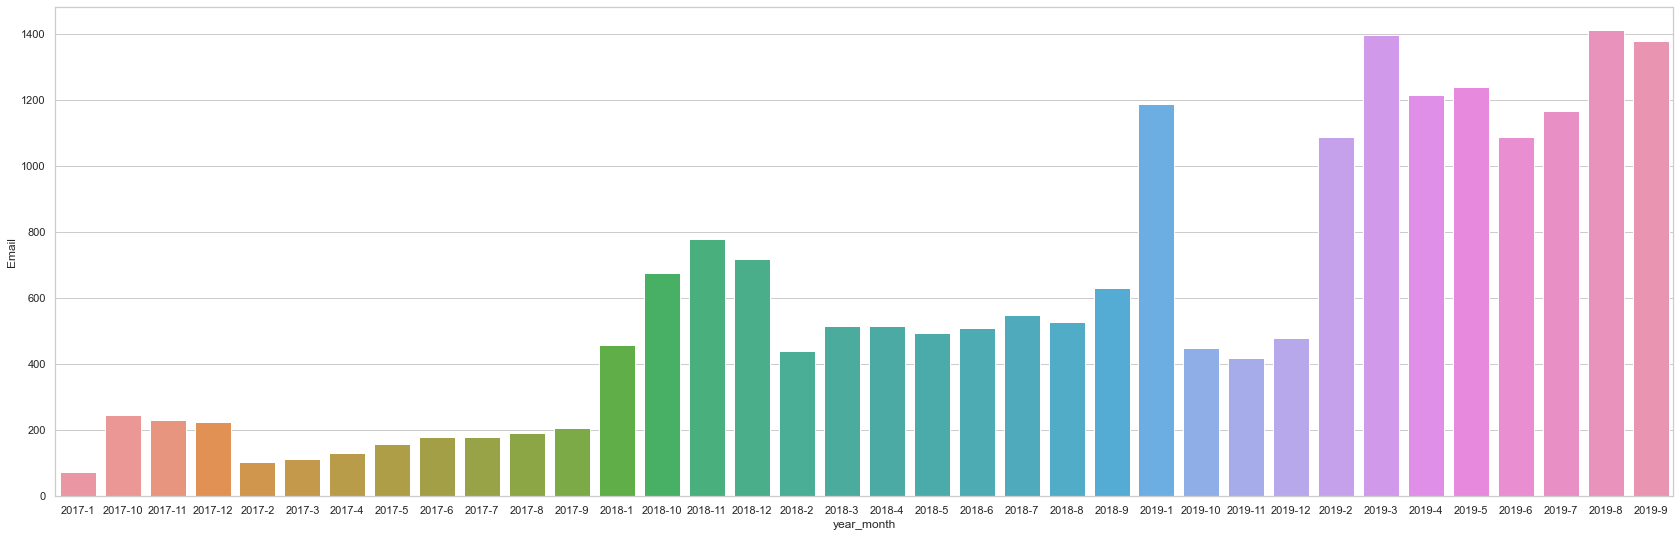

In [163]:
fig, ax = plt.subplots(figsize=(29,9))
sns.set_theme(style="whitegrid")
df1=sns.barplot(x="year_month", y="Email", data=df_month)

In [126]:
#6B Number of new consumers being added to the company each month along
new_customer=df[['Order num','Email','Date']].drop_duplicates().reset_index(drop=True).sort_values(by=['Email','Date'])
new_customer['Shop_rank']=new_customer.groupby('Email')['Date'].rank()
new_customer=new_customer[new_customer['Shop_rank']==1]
new_customer['Year']=new_customer['Date'].dt.year
new_customer['Month']=new_customer['Date'].dt.month
new_customer['year_month']=new_customer['Year'].astype('str')+'-'+ new_customer['Month'].astype('str')
new_customer=new_customer.groupby('year_month',as_index=False).agg({'Email':'nunique'})
new_customer

,year_month,Email
0,2017-1,73
1,2017-10,173
2,2017-11,133
3,2017-12,141
4,2017-2,101
5,2017-3,99
6,2017-4,110
7,2017-5,127
8,2017-6,143
9,2017-7,131


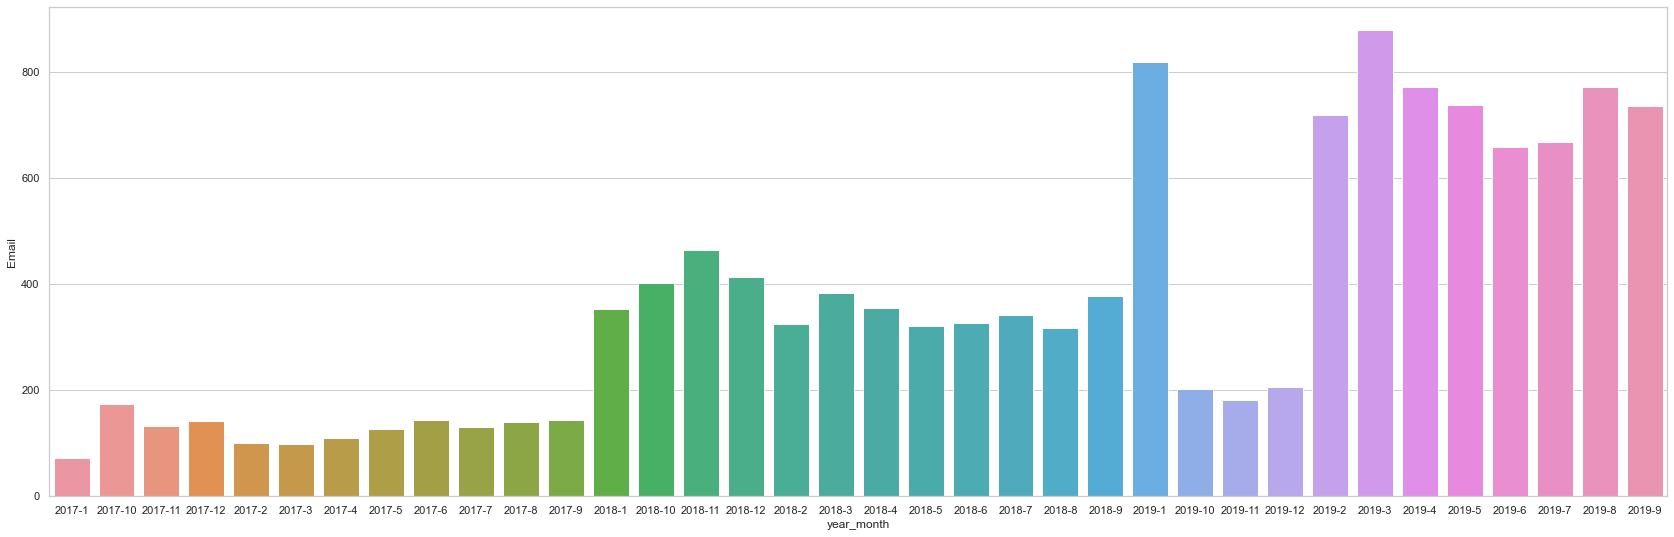

In [160]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(29, 9))
sns.set_theme(style="whitegrid")
df1=sns.barplot(x="year_month", y="Email", data=new_customer)